# Test of the msynchro code
This notebook contains tests of the msynchro python package. 

In [1]:
import test 
%matplotlib inline 
test.set_mpl_defaults()

### Test: Cooled delta-function spectrum
Our first test is simple advection of energy. We inject a delta function -- a population of electrons with a single energy or Lorentz factor. We define the cooling rate of electrons with energy $E=\gamma mc^2$ as
$$
\frac{dE}{dt} = -C_E E^{2}
$$
The energy of an electron with initial energy $E_0$ after cooling for a time $t$ is then given by
$$
E(t) = \frac{E_0^2}{E_0 - C_E E_0^2 t} 
$$
The test below compares the theoretically expected value with that obtained using msynchro's TDM algorithm. Some spreading in energy occurs due to numerical diffusion, but the peak of the distribution always matches theory. 

The plot shows the electron energy at $1$Myr intervals for a magnetic field strength of $6\mu$G. There are 1250 bins per energy decade in this case 

0.0008


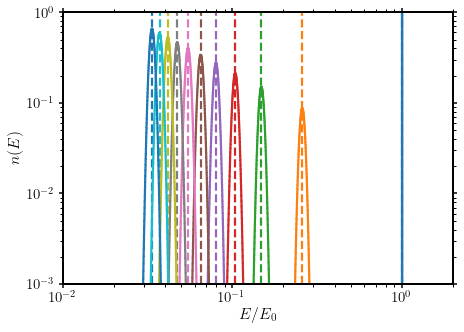

In [2]:
test.run_delta_test()

### Test: Cooled electron power-law spectrum
The theoretical Jaffe-Perola spectrum is given by, for an initial spectrum $n(E,t_0) = n_0 E^{-p}$,

$$
n(E,t)=
\left\{
\begin{array}{
  @{}% no padding
  @{}% no padding
}
  n_0 E^{-p} (1 - C_E E t)^{p-2}, &  E \leq 1/(C_E t) \\
  0. & E > 1/(C_E t) & 
\end{array}
\right.
$$

Thus, the ratio of the electron spectrum to the origin spectrum is, at $E\leq 1/(C_E t)$ given by 

$$
\frac{n(E,t)}{n(E,t_0)} = (1 - C_E E t)^{p-2}
$$

The next plot compares the ratio from the numerical calculation to the analytically expected one, for a time of $5$Myr and a magentic field strength of $6\mu$G. The spectrum is initialised with a power-law with $p=2.1$ and Lorentz factors ranging from $10$ to $10^9$, with 10,000 energy bins. 


/Users/matthews/cr/msynchro/tests/test.py:117: RuntimeWarning: invalid value encountered in power
  ne_analytic = (1 - energies * C_E * time) ** (BETA - 2)
/Users/matthews/cr/msynchro/tests/test.py:117: RuntimeWarning: invalid value encountered in sqrt
  ne_analytic = (1 - energies * C_E * time) ** (BETA - 2)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


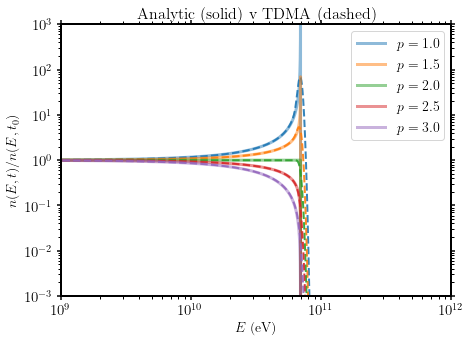

In [3]:
test.run_powerlaw_test()

Finally we test the synchrotron code against results obtained using Martin Hardcastle's pysynch code 